In [1]:
import numpy as np
from matplotlib import pyplot as plt
import meangpuFunction as TeacherFunc
from sklearn.model_selection import train_test_split
import time

dat = np.load('P1data.npy', allow_pickle=True) 
X = dat[:,:-1].astype(float) 
Y = dat[:, -1].reshape((-1,1))
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, test_size=0.14, random_state=1)

In [2]:
Y_Copy = Y_train
# reformat Y and prepare to do one hot [A B C D] = [0 1 2 3] 
Y_Copy[Y_Copy == 'A'] = 0
Y_Copy[Y_Copy == 'B'] = 1
Y_Copy[Y_Copy == 'C'] = 2
Y_Copy[Y_Copy == 'D'] = 3
Y_Copy = Y_Copy.astype(int)
Y_train_hot = TeacherFunc.onehot(Y_Copy)

In [3]:
import importlib
importlib.reload(TeacherFunc)

<module 'meangpuFunction' from 'c:\\Users\\meang\\Desktop\\ANNfinal\\ZeroToHero\\meangpuFunction.py'>

In [4]:
Y_train_int = Y_train.astype(int)
print(Y_train_int)

[[1]
 [2]
 [0]
 ...
 [0]
 [1]
 [0]]


MainLearn

sample: 0
Time spent: 3.119701862335205
sample: 1
Time spent: 3.1987171173095703
sample: 2
Time spent: 3.1967177391052246
sample: 3
Time spent: 3.1297028064727783
sample: 4
Time spent: 3.0976953506469727
sample: 5
Time spent: 3.067688226699829
sample: 6
Time spent: 3.1497063636779785
sample: 7
Time spent: 3.244727849960327
sample: 8
Time spent: 3.1892950534820557
sample: 9
Time spent: 3.2160565853118896
sample: 10
Time spent: 3.06868839263916
sample: 11
Time spent: 3.108806848526001
sample: 12
Time spent: 3.15552020072937
sample: 13
Time spent: 3.0866925716400146
sample: 14
Time spent: 3.1663782596588135
sample: 15
Time spent: 3.103205442428589
sample: 16
Time spent: 3.124701499938965
sample: 17
Time spent: 3.0549070835113525
sample: 18
Time spent: 3.0998456478118896
sample: 19
Time spent: 3.1106979846954346

All Accuracy
[0.652, 0.6317, 0.5913, 0.673, 0.6738, 0.6541, 0.6206, 0.7041, 0.6047, 0.6433, 0.6587, 0.6625, 0.6689, 0.6471, 0.627, 0.6049, 0.7099, 0.5756, 0.6773, 0.659]
highest: 

Text(0.5, 1.0, 'plot for i 20 times')

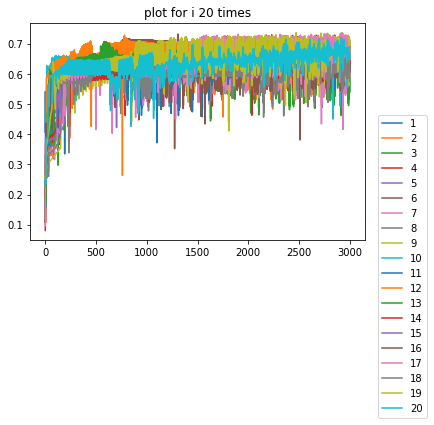

In [7]:
N, D = X_train.shape  # (3440, 2)
_, K = Y_train_hot.shape  # (3440, 4)


friendFolder = "tiger"

HU = 10
epochs = 3000

lr1Mul= 1
lr2Mul= 1

sample = 20

lr1 = (1/N) * lr1Mul
lr2 = (1/N) * lr2Mul

debugFileName = "testMeangpu.npy"
all_accuracy_list = []
all_t1 = time.time()

for i in range(sample):
    print(f"sample: {i}")
    W1 = np.random.rand(HU, D) - 0.5  # w === make value between -0.5 to 0.5
    b1 = np.random.rand(HU, 1) - 0.5   # b === make value between -0.5 to 0.5
    W2 = np.random.rand(K, HU) - 0.5   # v === make value between -0.5 to 0.5
    b2 = np.random.rand(K, 1) - 0.5   # c === make value between -0.5 to 0.5

    t1 = time.time()
    cc, vv, bb, ww, train_loss, accuracy_end = TeacherFunc.train_mlp2(b2, W2, b1, W1, X_train, Y_train_hot, Y_train_int, lr1, lr2,
                                            epochs, TeacherFunc.identity, TeacherFunc.mse_loss)
    t2 = time.time()

    net = {'c': cc, 'v': vv, 'b': bb, 'w': ww}

    # np.save(debugFileName, net)
    np.save(f'{friendFolder}/{accuracy_end[-1]:.4f}-{i}', net)

    print('Time spent:', t2 - t1)
    all_accuracy_list.append(accuracy_end[-1])

    plt.plot(accuracy_end, label=i+1)
    plt.legend(bbox_to_anchor=(1.2, 0.6))

all_t2 = time.time()
formattedList = ["%.4f" % member for member in all_accuracy_list]
float_list = list(map(float, formattedList))
print()
print("All Accuracy")
print(float_list)
print(f"highest: {(np.max(float_list))*100}% || lowest: {(np.min(float_list))*100}%")
print("---------------------------------------------")
print(f'LR1: {lr1Mul} || LR2: {lr2Mul} || HU: {HU} || epochs: {epochs} || sample: {sample}')
print(f"AVG accuracy = {(np.average(all_accuracy_list))*100:.2f}%")
print(f'Took {all_t2 - all_t1:.2f} seconds')
plt.title(f'plot for i {sample} times')


LearnEvolve

In [8]:
dat = np.load('P1data.npy', allow_pickle=True) 
X = dat[:,:-1].astype(float) 
Y = dat[:, -1].reshape((-1,1))
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, test_size=0.14, random_state=5)

Y_Copy = Y_train
# reformat Y and prepare to do one hot [A B C D] = [0 1 2 3] 
Y_Copy[Y_Copy == 'A'] = 0
Y_Copy[Y_Copy == 'B'] = 1
Y_Copy[Y_Copy == 'C'] = 2
Y_Copy[Y_Copy == 'D'] = 3
Y_Copy = Y_Copy.astype(int)
Y_train_hot = TeacherFunc.onehot(Y_Copy)

Y_train_int = Y_train.astype(int)

In [9]:
N, D = X_train.shape  # (3440, 2)
_, K = Y_train_hot.shape  # (3440, 4)

dat = np.load('P1data.npy', allow_pickle=True)
X = dat[:,:-1].astype(float)
Y = dat[:, -1]

HU = 6
epochs = 2000

lr1Mul= 0.4
lr2Mul= 0.6

sample = 20

lr1 = (1/N) * lr1Mul
lr2 = (1/N) * lr2Mul


all_accuracy_list = []
all_t1 = time.time()

debugFileName = "meangpuCollect/0.7544.npy"
loaded_net = np.load(debugFileName, allow_pickle=True).tolist()
loadCC, loadVV, loadBB, loadWW = loaded_net['c'], loaded_net['v'], loaded_net['b'], loaded_net['w']


for i in range(sample):
    print(f"sample: {i}")
    W1 = loaded_net['w']
    b1 = loaded_net['b']
    W2 = loaded_net['v']
    b2 = loaded_net['c']

    t1 = time.time()
    cc, vv, bb, ww, train_loss, accuracy_end = TeacherFunc.train_mlp2(b2, W2, b1, W1, X_train, Y_train_hot, Y_train_int, lr1, lr2,
                                            epochs, TeacherFunc.identity, TeacherFunc.mse_loss)
    t2 = time.time()

    net = {'c': cc, 'v': vv, 'b': bb, 'w': ww}

    #######################
    Yp = TeacherFunc.mlp2(cc, vv, bb, ww, X, TeacherFunc.softmax)

    # Post-process the output from [[0.1, 0.1, 0.2, 0.6], [0.1, 0.6, 0.1, 0.3]. ...] to [[3], [2], ...]
    realPredict = np.argmax(Yp, axis=1).reshape((-1,1))

    # [[0],[1],[2],[3]] = ['A', 'B', 'C', 'D']
    class_labels = ['A', 'B', 'C', 'D']
    predicted_labels = [class_labels[int(n)] for n in realPredict]
    test_acc = np.mean(predicted_labels == Y)
    
    #######################

    # np.save(debugFileName, net)
    np.save(f'meangpuCollect/{accuracy_end[-1]:.4f}-{i}-{test_acc*100:.2f}', net)

    print('Time spent:', t2 - t1)
    all_accuracy_list.append(accuracy_end[-1])

    plt.plot(accuracy_end, label=i+1)
    plt.legend(bbox_to_anchor=(1.2, 0.6))

all_t2 = time.time()
formattedList = ["%.4f" % member for member in all_accuracy_list]
float_list = list(map(float, formattedList))
print()
print("All Accuracy")
print(float_list)
print(f"highest: {(np.max(float_list))*100}% || lowest: {(np.min(float_list))*100}%")
print("---------------------------------------------")
print(f'LR1: {lr1Mul} || LR2: {lr2Mul} || HU: {HU} || epochs: {epochs} || sample: {sample}')
print(f"AVG accuracy = {(np.average(all_accuracy_list))*100:.2f}%")
print(f'Took {all_t2 - all_t1:.2f} seconds')
plt.title(f'plot for i {sample} times')


FileNotFoundError: [Errno 2] No such file or directory: 'meangpuCollect/0.7544.npy'

In [ ]:
print(loadCC.shape, loadVV.shape, loadBB.shape, loadWW.shape)

(4, 1) (4, 6) (6, 1) (6, 2)


Evaluate

In [10]:
def P1_predict(x):
  """
  x: np.array of shape (N,D)
  return y: list of classes
  """
  debugFileName = "tiger/0.7099-16.npy"

  # Load weights
  loaded_net = np.load(debugFileName, allow_pickle=True).tolist()

  # Run network
  Yp = TeacherFunc.mlp2(loaded_net['c'], loaded_net['v'], 
          loaded_net['b'], loaded_net['w'], x, TeacherFunc.identity)

  # Post-process the output from [[0.1, 0.1, 0.2, 0.6], [0.1, 0.6, 0.1, 0.3]. ...] to [[3], [2], ...]
  realPredict = np.argmax(Yp, axis=1).reshape((-1,1))

  # [[0],[1],[2],[3]] = ['A', 'B', 'C', 'D']
  class_labels = ['A', 'B', 'C', 'D']


  predicted_labels = [class_labels[int(n)] for n in realPredict]
  # predicted_labels = [class_labels[int(n)] for n in np.round(Yp)]

  return predicted_labels

In [ ]:
dat = np.load('P1data.npy', allow_pickle=True)
X = dat[:,:-1].astype(float)
Y = dat[:, -1]

plabs = P1_predict(X)

acc = np.mean(plabs == Y)
print('Accuracy', acc)

Accuracy 0.7295


In [ ]:
print(plabs)
print(Y)

In [16]:
dat = np.load('P1data.npy', allow_pickle=True)
X = dat[:,:-1].astype(float)
Y = dat[:, -1]

debugFileName = "tiger/0.6049-15.npy"
loaded_net = np.load(debugFileName, allow_pickle=True).tolist()
loadCC, loadVV, loadBB, loadWW = loaded_net['c'], loaded_net['v'], loaded_net['b'], loaded_net['w']

Yp = TeacherFunc.mlp2(loadCC, loadVV, loadBB, loadWW, X, TeacherFunc.softmax)

# Post-process the output from [[0.1, 0.1, 0.2, 0.6], [0.1, 0.6, 0.1, 0.3]. ...] to [[3], [2], ...]
realPredict = np.argmax(Yp, axis=1).reshape((-1,1))

# [[0],[1],[2],[3]] = ['A', 'B', 'C', 'D']
class_labels = ['A', 'B', 'C', 'D']
predicted_labels = [class_labels[int(n)] for n in realPredict]


test_acc = np.mean(predicted_labels == Y)
print('Test accuracy', test_acc)

Test accuracy 0.63525
